In [9]:
import pandas as pd
import json

# Load CSV data
df = pd.read_csv("pgweb-1729866354.csv")

# Function to extract price from event data
def extract_price(event_data):
    try:
        data = json.loads(event_data)  # Parse JSON
        eth_amount = float(data.get('amount0', 0))
        token_amount = float(data.get('amount1', 0))
        if token_amount == 0:
            return None
        return eth_amount / token_amount  # Calculate price
    except (ValueError, KeyError, TypeError):
        return None

# Add a new column for price
df['price'] = df['event_data'].apply(extract_price)

# Assuming df_other_exchange contains the same structure for another exchange
df_other_exchange = df.copy()  # Placeholder for comparison

# Find price discrepancies for arbitrage
arbitrage_opportunities = df.merge(df_other_exchange, on='block_timestamp', suffixes=('_uniswap', '_other'))
arbitrage_opportunities['price_diff'] = abs(arbitrage_opportunities['price_uniswap'] - arbitrage_opportunities['price_other'])

# Filter by a threshold (1% price difference)
arbitrage_opportunities = arbitrage_opportunities[arbitrage_opportunities['price_diff'] > 0.01 * arbitrage_opportunities['price_uniswap']]

# Output the arbitrage opportunities
print(arbitrage_opportunities[['block_timestamp', 'price_uniswap', 'price_other', 'price_diff']])


         block_timestamp  price_uniswap  price_other    price_diff
0    2024-07-29 17:12:59      -0.999995    -0.999995  0.000000e+00
1    2024-07-29 17:13:23      -0.999795    -0.999795  0.000000e+00
2    2024-07-29 17:13:35      -0.999995    -0.999995  0.000000e+00
3    2024-07-29 17:13:47      -0.999795    -0.999795  0.000000e+00
4    2024-07-29 17:14:59      -0.999794    -0.999794  0.000000e+00
..                   ...            ...          ...           ...
127  2024-07-29 18:34:47      -0.999991    -0.999991  0.000000e+00
128  2024-07-29 18:34:47      -0.999991    -0.999991  2.746906e-08
129  2024-07-29 18:34:47      -0.999991    -0.999991  2.746906e-08
130  2024-07-29 18:34:47      -0.999991    -0.999991  0.000000e+00
131  2024-07-29 18:35:23      -0.999791    -0.999791  0.000000e+00

[132 rows x 4 columns]


In [11]:
arbitrage_opportunities.head()

,contract_uniswap,block_uniswap,event_name_uniswap,event_data_uniswap,transaction_hash_uniswap,gas_uniswap,gas_price_uniswap,log_index_uniswap,block_timestamp,price_uniswap,contract_other,block_other,event_name_other,event_data_other,transaction_hash_other,gas_other,gas_price_other,log_index_other,price_other,price_diff
0,0x3416cf6c708da44db2624d63ea0aaef7113527c6,20413639,Swap,"{""sender"": ""0x3b3ae790Df4F312e745D270119c60529...",0xdc7410256698cdc134515eff07bcad33d47c0630cf1b...,566796,9934758574,131,2024-07-29 17:12:59,-0.999995,0x3416cf6c708da44db2624d63ea0aaef7113527c6,20413639,Swap,"{""sender"": ""0x3b3ae790Df4F312e745D270119c60529...",0xdc7410256698cdc134515eff07bcad33d47c0630cf1b...,566796,9934758574,131,-0.999995,0.0
1,0x3416cf6c708da44db2624d63ea0aaef7113527c6,20413641,Swap,"{""sender"": ""0xdEF4a2438DF14050D98C0e9d4D930000...",0x722059152617693a1edc49457af95b631c531959512d...,431132,8427505991,173,2024-07-29 17:13:23,-0.999795,0x3416cf6c708da44db2624d63ea0aaef7113527c6,20413641,Swap,"{""sender"": ""0xdEF4a2438DF14050D98C0e9d4D930000...",0x722059152617693a1edc49457af95b631c531959512d...,431132,8427505991,173,-0.999795,0.0
2,0x3416cf6c708da44db2624d63ea0aaef7113527c6,20413642,Swap,"{""sender"": ""0x5B93D80DA1a359340d1F339FB574bDC5...",0x20f5ec8aab2339510631b2136e53d22b94d1670fef48...,790100,11124710376,106,2024-07-29 17:13:35,-0.999995,0x3416cf6c708da44db2624d63ea0aaef7113527c6,20413642,Swap,"{""sender"": ""0x5B93D80DA1a359340d1F339FB574bDC5...",0x20f5ec8aab2339510631b2136e53d22b94d1670fef48...,790100,11124710376,106,-0.999995,0.0
3,0x3416cf6c708da44db2624d63ea0aaef7113527c6,20413643,Swap,"{""sender"": ""0x1111111254EEB25477B68fb85Ed929f7...",0xf3b2bf54430471c00d169e40cf063204933589d01df1...,532800,8603924626,259,2024-07-29 17:13:47,-0.999795,0x3416cf6c708da44db2624d63ea0aaef7113527c6,20413643,Swap,"{""sender"": ""0x1111111254EEB25477B68fb85Ed929f7...",0xf3b2bf54430471c00d169e40cf063204933589d01df1...,532800,8603924626,259,-0.999795,0.0
4,0x3416cf6c708da44db2624d63ea0aaef7113527c6,20413649,Swap,"{""sender"": ""0x24902AA0cf0000a08c0EA0b003B0c0bF...",0xc433500cb88b7222131e97dd8fabed71b78d5e7e14b3...,498230,21318448545,50,2024-07-29 17:14:59,-0.999794,0x3416cf6c708da44db2624d63ea0aaef7113527c6,20413649,Swap,"{""sender"": ""0x24902AA0cf0000a08c0EA0b003B0c0bF...",0xc433500cb88b7222131e97dd8fabed71b78d5e7e14b3...,498230,21318448545,50,-0.999794,0.0


In [3]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 3.0 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


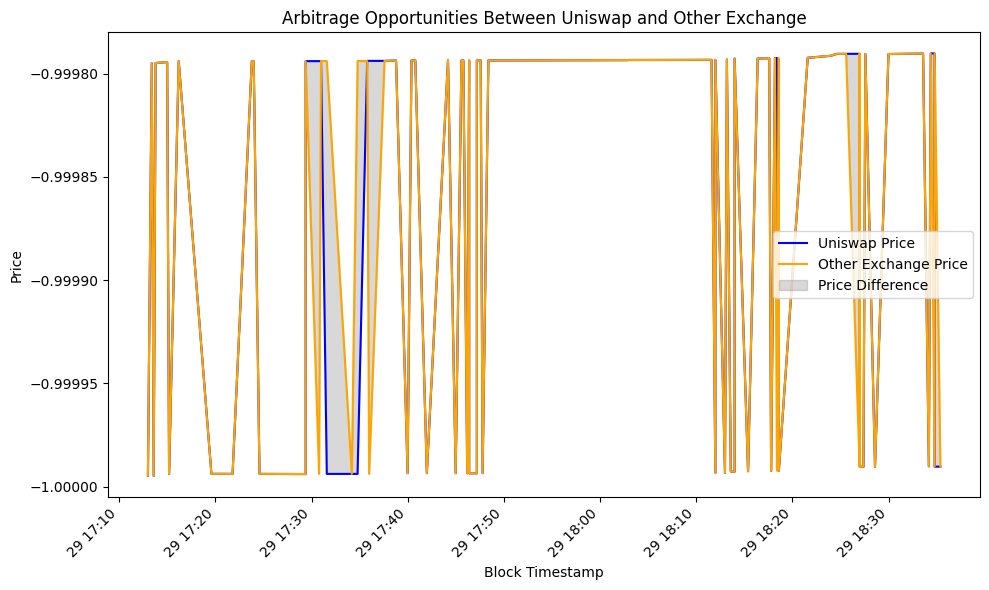

In [20]:
import matplotlib.pyplot as plt
# Plot the price differences over time (timestamps)
plt.figure(figsize=(10, 6))
plt.plot(arbitrage_opportunities['block_timestamp'], arbitrage_opportunities['price_uniswap'], label='Uniswap Price', color='blue')
plt.plot(arbitrage_opportunities['block_timestamp'], arbitrage_opportunities['price_other'], label='Other Exchange Price', color='orange')
plt.fill_between(arbitrage_opportunities['block_timestamp'], arbitrage_opportunities['price_uniswap'], arbitrage_opportunities['price_other'], color='gray', alpha=0.3, label='Price Difference')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Block Timestamp')
plt.ylabel('Price')
plt.title('Arbitrage Opportunities Between Uniswap and Other Exchange')
plt.legend()
plt.tight_layout()
plt.show()